Marginalized posteriors for selected parameters for GW231123 and from the NRSur maximum-likelihood (maxL) simulations in zero-noise for three waveform models. 

(Figure 2 and Figure 11)

In [ ]:
import bilby
import matplotlib.pyplot as plt
import glob
import numpy as np
import h5py
import pandas as pd
from pesummary.utils.samples_dict import MultiAnalysisSamplesDict
from scipy import stats
from scipy.stats import gaussian_kde
from pesummary.utils.bounded_2d_kde import Bounded_2d_kde
from pesummary.utils.bounded_1d_kde import bounded_1d_kde
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import matplotlib.ticker as ticker
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
matplotlib.rcParams.update({'font.size': 17})
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['legend.fontsize'] = 20
import matplotlib.collections as mcoll
import matplotlib.lines as mlines
import matplotlib.lines as mlines
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
import config
import warnings
warnings.filterwarnings('ignore')

In [2]:
#remove default legend
def remove_legend():
    axs[0].grid(False)
    axs[2].grid(False)
    axs[3].grid(False)

    if hasattr(fig, "legends"):
        for leg in list(fig.legends):
            try:
                leg.remove()
            except Exception:
                pass
    
    if getattr(fig, "legend_", None) is not None:
        try:
            fig.legend_.remove()
        except Exception:
            pass
    
    if getattr(fig, "_legend", None) is not None:
        try:
            fig._legend.remove()
        except Exception:
            pass
    
    # 2) Remove axis-level legends
    for ax in fig.axes:
        leg = ax.get_legend()
        if leg is not None:
            try:
                leg.remove()
            except Exception:
                # fallback: hide it
                try:
                    leg.set_visible(False)
                except Exception:
                    pass
    
    # 3) Global pyplot fallback (if anything was created on current figure via plt)
    try:
        lg = plt.gca().get_legend()
        if lg is not None:
            lg.remove()
    except Exception:
        pass


In [3]:
#remove default credible interval vertical lines
def remove_vlines():
    n_params = 2  # since you have two parameters: m1, m2
    for i in range(n_params):
        ax = axs[i * (n_params + 1)]
        for line in list(ax.lines):  # make a copy so we can safely remove
            xdata = line.get_xdata()
            # Remove only vertical lines (x constant)
            if len(set(np.round(xdata, 8))) == 1:
                line.remove()


In [4]:
#dotted linestyle for GW231123 and solid for zero-noise simulation
def linestyle_contour2(n_1d, n_2d):

    for j,ax in enumerate(axs):
        if j ==0 or j ==3: # 1D panels
            count_1D = 0
            for line in ax.lines:
                if count_1D < n_1d:
                    line.set_linestyle("--")
                    line.set_linewidth(1.0)
                    count_1D += 1
                else:
                    break
    
        if j ==2:      #2D panels
            count_2D = 0
            for line in ax.lines:
                if count_2D < n_2d:
                    line.set_linestyle("--")
                    line.set_linewidth(1.0)
                    count_2D += 1
                else:
                    break


### Load event samples

In [5]:
result_files_XPHM = config.gw231123_BF_XPHM
result_files_Xo4a = config.gw231123_BF_XO4a
result_files_NRSUR  = config.gw231123_BF_NRSUR

### Load NRSUR maximum-likelihood injection in zero noise samples

In [6]:
result_files_XPHM_0noise = config.maxLNRSUR_BF_XPHM
result_files_NRSUR_0noise = config.maxLNRSUR_BF_NRSUR
result_files_Xo4a_0noise =config.maxLNRSUR_BF_XO4a

In [7]:
data_all = MultiAnalysisSamplesDict.from_files({
    "GW231123 XPHM": result_files_XPHM,
    "GW231123 NRSUR": result_files_NRSUR,
    "GW231123 XO4a": result_files_Xo4a,
 
    "maxL XPHM": result_files_XPHM_0noise,
    "maxL NRSUR": result_files_NRSUR_0noise,
    "maxL XO4a": result_files_Xo4a_0noise,
    })

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


21:47 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
21:47 bilby WARNING : Prior sampling efficiency is very low, please verify its validity.
2026-01-13  21:47:19 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2026-01-13  21:47:19 PESummary WARNING : The redshift is being approximated using interpolation. Bear in mind that this does introduce a small error.
2026-01-13  21:47:41 PESummary INFO    : Averaging the final spin from the following fits: function bbh_final_spin_precessing_projected_UIB2016 at 0x7fbe912288b0, function bbh_final_spin_precessing_projected_Healyetal at 0x7fbe91228700, function bbh_final_spin_precessing_HBR2016 at 0x7fbe91228a60
2026-0

In [8]:
#load simulation results to draw true values
result_0_noise_NRSUR_file = config.maxLNRSUR_BF_NRSUR
results_0_noise_NRSUR = bilby.result.read_in_result(result_0_noise_NRSUR_file)

21:49 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


### Create figures

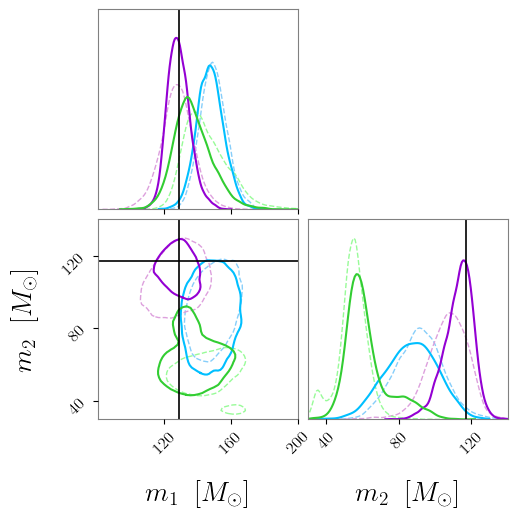

In [9]:
#componenent masses

#set fontsize
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

fig = data_all.plot(
    parameters=["mass_1_source", "mass_2_source"], type="corner",
    kde=bounded_1d_kde, kde_2d=Bounded_2d_kde,
    levels=[0.9],
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False,
    plot_datapoints=False,
    corner_kwargs = dict(linestyles='dotted')
    )
#fix axes limits
axs = fig.axes
axs[0].set_xlim(80,200) 
axs[0].set_ylim(0,0.069) 
axs[3].set_ylim(0,0.069) 
axs[2].set_xlim(80,200) 
axs[2].set_ylim(30,140) 
axs[3].set_xlim(30,140) 

remove_vlines()            
linestyle_contour2(3,4)

#true values from maximum-likelihood
axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_1_source'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_1_source'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['mass_2_source'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_2_source'],color='black',linewidth=1.2)

#set labels
axs[2].set_xlabel(r"$m_1 \ \ \mathrm{[} M_\odot \mathrm{]}$",fontsize=20)
axs[3].set_xlabel(r"$m_2 \ \ \mathrm{[} M_\odot \mathrm{]}$",fontsize=20)
axs[2].set_ylabel(r"$m_2 \ \ \mathrm{[} M_\odot \mathrm{]}$",fontsize=20)

remove_legend()
plt.draw()

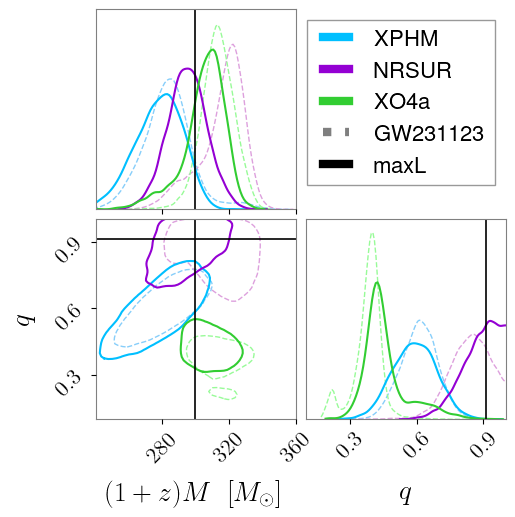

In [18]:
#Mass ratio and detector-frame total mass
fig = data_all.plot(
    parameters=["total_mass", "mass_ratio"], type="corner",
    levels=[0.9], kde=bounded_1d_kde,  kde_kwargs={"mass_ratio": {"xlow": 0., "xhigh": 1.}}, kde_2d=Bounded_2d_kde, smooth=2,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False, 
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes
axs[0].set_ylim(0,0.047) 
axs[3].set_ylim(0,10) 
axs[0].set_xlim(240,360) 
axs[2].set_xlim(240,360) 
axs[2].set_ylim(0.1,1) 
axs[3].set_xlim(0.1,1) 

remove_vlines()            
linestyle_contour2(3,4)

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['total_mass'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['total_mass'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['mass_ratio'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_ratio'],color='black',linewidth=1.2)

axs[2].set_xlabel(r"$(1+z)M \ \ \mathrm{[} M_\odot \mathrm{]}$", fontsize = 20)
axs[2].set_ylabel(r"$q$", fontsize = 20)
axs[3].set_xlabel(r"$q$", fontsize = 20)

#set legend
remove_legend()
fp = FontProperties(family="STIXGeneral", math_fontfamily='stix', size=16)          # legend entries

# Waveform model color mapping
model_handles = [
    mlines.Line2D([], [], color="deepskyblue", linestyle="-",
                  label="XPHM"),
    mlines.Line2D([], [], color="darkviolet", linestyle="-",
                label="NRSUR"),
    mlines.Line2D([], [], color="limegreen", linestyle="-",
                  label="XO4a"),
]

# Line style meaning
style_handles = [
    mlines.Line2D([], [], color="black", linestyle=':',
                  linewidth=1, label="GW231123", alpha=0.5),
    mlines.Line2D([], [], color="black", linestyle="-",
                  linewidth=1, label="maxL"),
]

# Combine them in one legend
all_handles = model_handles + style_handles

axs[1].legend(handles=all_handles, prop=fp, frameon=True, loc="upper right",handlelength=1.8)

plt.draw()


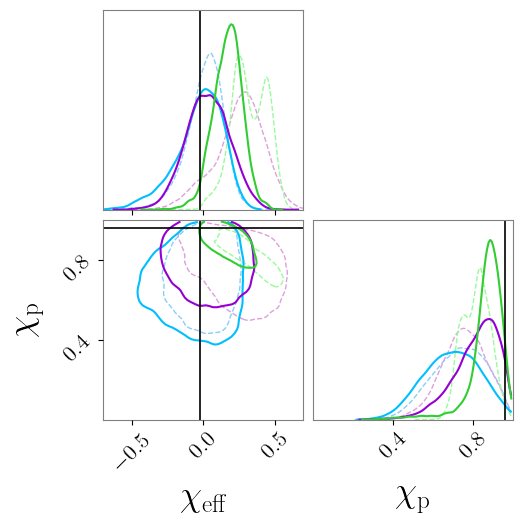

In [11]:
#spins

#set different fontsize
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

fig = data_all.plot(
    parameters=["chi_eff","chi_p"], type="corner",
    levels=[0.9], kde=bounded_1d_kde,  kde_kwargs={"chi_eff": {"xlow": -1, "xhigh":1}, "chi_p": {"xlow": 0., "xhigh": 1.}}, kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False,
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )

axs = fig.axes
axs[0].set_xlim(-0.7,0.7)
axs[2].set_xlim(-0.7,0.7)
axs[2].set_ylim(0,1)
axs[3].set_xlim(0,1)

remove_vlines()            
linestyle_contour2(3,3)

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_eff'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_eff'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['chi_p'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_p'],color='black',linewidth=1.2)

axs[2].set_xlabel(r"$\chi_{\mathrm{eff}}$", fontsize = 26)
axs[2].set_ylabel(r"$\chi_{\mathrm{p}}$", fontsize = 26)
axs[3].set_xlabel(r"$\chi_{\mathrm{p}}$", fontsize = 26)

remove_legend()
plt.draw()

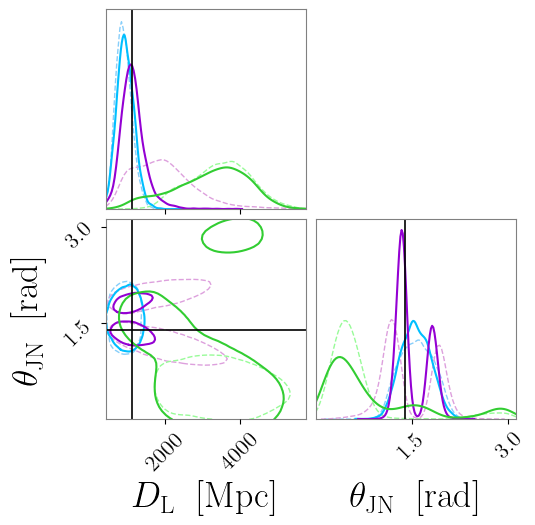

In [12]:
#luminosity distance and inclination

fig = data_all.plot(
    parameters=["luminosity_distance","theta_jn"], type="corner",
    levels=[0.9], kde=bounded_1d_kde, kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False, 
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes
axs[0].set_ylim(0,0.002) 
axs[3].set_ylim(0,3.4) 

remove_vlines()            
linestyle_contour2(3,4)

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['luminosity_distance'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['luminosity_distance'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['theta_jn'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['theta_jn'],color='black',linewidth=1.2)

remove_legend()
axs[2].set_xlabel(r"$D_{\mathrm{L}} \ \ \mathrm{[} \mathrm{Mpc} \mathrm{]}$",fontsize = 26)
axs[2].set_ylabel(r"$\theta_{\mathrm{JN}} \ \ \mathrm{[} \mathrm{rad} \mathrm{]}$",fontsize = 26)
axs[3].set_xlabel(r"$\theta_{\mathrm{JN}} \ \ \mathrm{[} \mathrm{rad} \mathrm{]}$",fontsize = 26)

plt.draw()

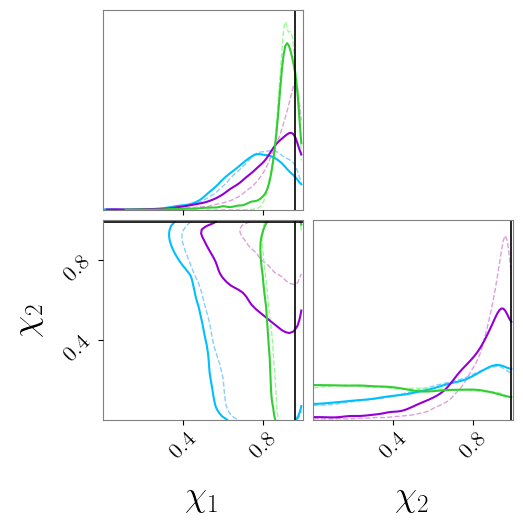

In [13]:
#spin magnitudes
fig = data_all.plot(
    parameters=["a_1","a_2"], type="corner",
    levels=[0.9], kde=bounded_1d_kde,  kde_kwargs={"a_1": {"xlow": 0., "xhigh": 1.},"a_2": {"xlow": 0., "xhigh": 1.}}, kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    latex_friendly=["chi1", "chi2"],
    plot_contours=True,
    fill_contours=False,
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes
axs[0].set_xlim(0,1)
axs[2].set_xlim(0,1)
axs[2].set_ylim(0,1)
axs[3].set_xlim(0,1)
axs[3].set_ylim(0,6.5)
axs[0].set_ylim(0,9.5)

remove_vlines() 
linestyle_contour2(3,5)

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['a_1'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['a_1'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['a_2'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['a_2'],color='black',linewidth=1.2)

remove_legend()
axs[2].set_xlabel(f"$\chi_1$",fontsize = 26)
axs[2].set_ylabel(f"$\chi_2$",fontsize = 26)
axs[3].set_xlabel(f"$\chi_2$",fontsize = 26)

plt.draw()

In [14]:
result_files_XPHM_old = "/home/pe.o4/GWTC4/working/S231123cg/bilby-IMRPhenomXPHM-SpinTaylor/final_result/bilby-IMRPhenomXPHM-SpinTaylor_data0_1384782888-634277_analysis_H1L1_merge_result.hdf5"
result_files_NRSUR_old = "/home/pe.o4/GWTC4/working/S231123cg/bilby-NRSur7dq4/final_result/bilby-NRSur7dq4_data0_1384782888-634277_analysis_H1L1_merge_result.hdf5"
result_files_Xo4a_old = "/home/charlie.hoy/projects/O4/S231123cg/catalog_settings/bilby-IMRPhenomXO4a/outdir/final_result/bilby-IMRPhenomXO4a_data0_1384782888-634277_analysis_H1L1_merge_result.hdf5" #from GW231123 git repository, PE review

data_event_comparison = MultiAnalysisSamplesDict.from_files({
    "XPHM bilby fixed": result_files_XPHM,
    "NRSUR  bilby fixed": result_files_NRSUR,
    "XO4a  bilby fixed": result_files_Xo4a,
 
    "XPHM": result_files_XPHM_old,
    "NRSUR": result_files_NRSUR_old,
    "XO4a": result_files_Xo4a_old,
    })

21:49 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
21:49 bilby WARNING : Prior sampling efficiency is very low, please verify its validity.
2026-01-13  21:50:09 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2026-01-13  21:50:09 PESummary WARNING : The redshift is being approximated using interpolation. Bear in mind that this does introduce a small error.
2026-01-13  21:50:31 PESummary INFO    : Averaging the final spin from the following fits: function bbh_final_spin_precessing_projected_UIB2016 at 0x7fbe912288b0, function bbh_final_spin_precessing_projected_Healyetal at 0x7fbe91228700, function bbh_final_spin_precessing_HBR2016 at 0x7fbe91228a60
2026-0

bbh_final_spin_precessing_HBR2016(): The argument of the square root is negative for indexes [10633]; truncating it to zero.


2026-01-13  21:51:18 PESummary INFO    : Averaging the final mass from the following fits: function bbh_final_mass_non_precessing_UIB2016 at 0x7fbe91228040, function bbh_final_mass_non_precessing_Healyetal at 0x7fbea2733e20
21:51 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
21:51 bilby WARNING : Prior sampling efficiency is very low, please verify its validity.
2026-01-13  21:51:28 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2026-01-13  21:51:28 PESummary WARNING : The redshift is being approximated using interpolation. Bear in mind that this does introduce a small error.
2026-01-13  21:51:47 PESummary INFO    : Averaging the final spin from the follo

In [15]:

'''
fig = data_event_comparison.plot(
    parameters=["total_mass", "luminosity_distance", "chi_eff"], type="corner",
    levels=[0.9], kde=bounded_1d_kde, #kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False, 
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes

remove_vlines()            

### 2D contour
for ax in fig.axes:
        count=0
        for artist in ax.collections:
            if count < 6:            
                try:
                    artist.set_linestyle("--")
                    count +=1
                except Exception:
                    pass


    # 1D panels
for ax in axs:
        print(count_1D)
        count_1D = 0
        for line in ax.lines:
            
            if count_1D < 3:
                line.set_linestyle("--")
                line.set_linewidth(1.0)
                count_1D += 1
#axs[2].set_xlabel(f"$(1+z)M$ [$M_\odot$]")
remove_legend()
import matplotlib.lines as mlines
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

fp = FontProperties(family="STIXGeneral", size=14)          # legend entries

# Waveform model color mapping
model_handles = [
    mlines.Line2D([], [], color="deepskyblue", linestyle="-",
                  linewidth=2, label="NRSur"),
    mlines.Line2D([], [], color="darkviolet", linestyle="-",
                  linewidth=2, label="XPHM"),
    mlines.Line2D([], [], color="limegreen", linestyle="-",
                  linewidth=2, label="XO4a"),
]

# Line style meaning
style_handles = [
    mlines.Line2D([], [], color="black", linestyle="--",
                  linewidth=1.5, label="GW231123 bilby fixed", alpha=0.5),
    mlines.Line2D([], [], color="black", linestyle="-",
                  linewidth=1.5, label="GW231123 bilby old"),
]

# Combine them in one legend
all_handles = model_handles + style_handles

axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")

plt.draw()
plt.draw()
#fig.savefig('plots/maxLNRSUR_BF__M_q.png',dpi=300)
'''

'\nfig = data_event_comparison.plot(\n    parameters=["total_mass", "luminosity_distance", "chi_eff"], type="corner",\n    levels=[0.9], kde=bounded_1d_kde, #kde_2d=Bounded_2d_kde,  \n    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   \n    plot_contours=True,\n    fill_contours=False, \n    plot_datapoints=False,\n    quantiles=[0.05,0.95],\n    )\naxs = fig.axes\n\nremove_vlines()            \n\n### 2D contour\nfor ax in fig.axes:\n        count=0\n        for artist in ax.collections:\n            if count < 6:            \n                try:\n                    artist.set_linestyle("--")\n                    count +=1\n                except Exception:\n                    pass\n\n\n    # 1D panels\nfor ax in axs:\n        print(count_1D)\n        count_1D = 0\n        for line in ax.lines:\n            \n            if count_1D < 3:\n                line.set_linestyle("--")\n                line.set_linewidth(1.0)\n                count_

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│   16 axs[3].set_xlim(0.1,1)                                                                      │
│   17                                                                                             │
│   18 remove_vlines()                                                                             │
│ ❱ 19 linestyle_contour()                                                                         │
│   20                                                                                             │
│   21 axs[2].set_xlabel(f"$(1+z)M$ [$M_\odot$]")                                                  │
│   22 remove_legend()                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'linestyle_contour' is not defined

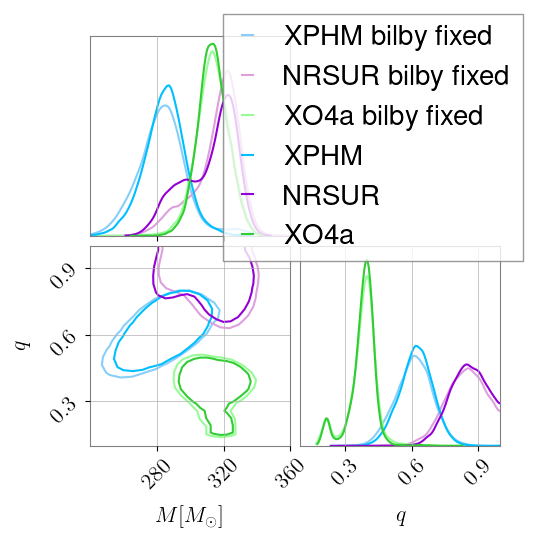

In [16]:
fig = data_event_comparison.plot(
    parameters=["total_mass", "mass_ratio"], type="corner",
    levels=[0.9], kde=bounded_1d_kde,  kde_kwargs={"mass_ratio": {"xlow": 0., "xhigh": 1.}}, #kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False, 
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes
axs[0].set_ylim(0,0.047) 
axs[3].set_ylim(0,11) 
axs[0].set_xlim(240,360) 
axs[2].set_xlim(240,360) 
axs[2].set_ylim(0.1,1) 
axs[3].set_xlim(0.1,1) 

remove_vlines()            
linestyle_contour()

axs[2].set_xlabel(f"$(1+z)M$ [$M_\odot$]")
remove_legend()

fp = FontProperties(family="STIXGeneral", size=12)          # legend entries

# Waveform model color mapping
model_handles = [
    mlines.Line2D([], [], color="deepskyblue", linestyle="-",
                  linewidth=2, label="XPHM"),
    mlines.Line2D([], [], color="darkviolet", linestyle="-",
                  linewidth=2, label="NRSur"),
    mlines.Line2D([], [], color="limegreen", linestyle="-",
                  linewidth=2, label="XO4a"),
]

# Line style meaning
style_handles = [
    mlines.Line2D([], [], color="black", linestyle="--",
                  linewidth=1.5, label="GW231123 bilby fixed", alpha=0.5),
    mlines.Line2D([], [], color="black", linestyle="-",
                  linewidth=1.5, label="GW231123 bilby old"),
]

# Combine them in one legend
all_handles = model_handles + style_handles

axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")

plt.draw()
plt.draw()
fig.savefig('plots/bilby_bug/gw231123_M_q.png',dpi=300)

In [ ]:
fig = data_event_comparison.plot(
    parameters=["chi_eff","chi_p"], type="corner",
    levels=[0.9], kde=bounded_1d_kde,  kde_kwargs={"chi_eff": {"xlow": -1, "xhigh":1}, "chi_p": {"xlow": 0., "xhigh": 1.}}, #kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False,
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )

axs = fig.axes
axs[0].set_xlim(-0.7,0.7)
axs[2].set_xlim(-0.7,0.7)
axs[2].set_ylim(0,1)
axs[3].set_xlim(0,1)

remove_vlines()            
linestyle_contour()

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_eff'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_eff'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['chi_p'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_p'],color='black',linewidth=1.2)

remove_legend()
axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")

plt.draw()

fig.savefig('plots/bilby_bug/gw231123_chi_eff_chip.png',dpi=300)

In [ ]:
fig = data_event_comparison.plot(
    parameters=["luminosity_distance","theta_jn"], type="corner",
    levels=[0.9], kde=bounded_1d_kde, #kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False, 
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes
axs[0].set_ylim(0,0.0023) 
axs[3].set_ylim(0,3.2) 
remove_vlines()            

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['luminosity_distance'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['luminosity_distance'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['theta_jn'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['theta_jn'],color='black',linewidth=1.2)

remove_legend()
linestyle_contour()
axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")

plt.draw()

fig.savefig('plots/bilby_bug/gw231123_distance.png',dpi=300)

In [ ]:
fig = data_event_comparison.plot(
    parameters=["mass_1_source", "mass_2_source"], type="corner",
    kde=bounded_1d_kde, #kde_2d=Bounded_2d_kde,
    levels=[0.9],
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False,
    #quantiles=[10.05,0.95],
    plot_datapoints=False,
    corner_kwargs = dict(linestyles='dotted')
    )
axs = fig.axes
axs[0].set_xlim(80,200) 
axs[0].set_ylim(0,0.069) 
axs[3].set_ylim(0,0.069) 
axs[2].set_xlim(80,200) 
axs[2].set_ylim(30,140) 
axs[3].set_xlim(30,140) 

remove_vlines()            
linestyle_contour()

#injected values from maximum-likelihood
axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_1_source'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_1_source'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['mass_2_source'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_2_source'],color='black',linewidth=1.2)

axs[2].set_xlabel(f"$m_1$ [$M_\odot$]")
axs[3].set_xlabel(f"$m_2$ [$M_\odot$]")
axs[2].set_ylabel(f"$m_2$ [$M_\odot$]")

remove_legend()
axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")
plt.draw()

fig.savefig('plots/bilby_bug/gw231123_m1_m2.png',dpi=300)

In [ ]:
fig = data_event_comparison.plot(
    parameters=["a_1","a_2"], type="corner",
    levels=[0.9], kde=bounded_1d_kde,  kde_kwargs={"a_1": {"xlow": 0., "xhigh": 1.},"a_2": {"xlow": 0., "xhigh": 1.}}, #kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    latex_friendly=["chi1", "chi2"],
    plot_contours=True,
    fill_contours=False,
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes
axs[0].set_xlim(0,1)
axs[2].set_xlim(0,1)
axs[2].set_ylim(0,1)
axs[3].set_xlim(0,1)
axs[3].set_ylim(0,6.5)
axs[0].set_ylim(0,9.5)

remove_vlines()            
linestyle_contour()

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['a_1'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['a_1'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['a_2'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['a_2'],color='black',linewidth=1.2)

remove_legend()
axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")

plt.draw()

fig.savefig('plots/bilby_bug/gw231123_a1_a2.png',dpi=300)

In [ ]:
#NRSur maximum-likelihood injections in zero noise, recovered with three waveform models
result_files_XPHM_0noise_BF = "/home/sophie.bini/project/PE/S231123_maxL_0noise/BILBY_FIXED/outdir_H1L1_xphm_BF/final_result/maxL_BF_injection_H1L1_0noise_BF_data0_1384782888-634277_analysis_H1L1_result.hdf5"
result_files_NRSUR_0noise_BF = "/home/sophie.bini/project/PE/S231123_maxL_0noise/BILBY_FIXED/outdir_H1L1_nrsur_BG/final_result/maxL_BF_injection_H1L1_nrsur_BF_data0_1384782888-634277_analysis_H1L1_result.hdf5"
result_files_Xo4a_0noise_BF ="/home/sophie.bini/project/PE/S231123_maxL_0noise/BILBY_FIXED/outdir_XO4a_H1L1_BF/final_result/maxL_BF_injection_H1L1_XO4a_0noise_BF_data0_1384782888-634277_analysis_H1L1_result.hdf5"

result_files_XPHM_0noise = "/home/sophie.bini/project/PE/S231123_maxL_0noise/outdir_H1L1/final_result/maxL_injection_H1L1_0noise_data0_1384782888-634277_analysis_H1L1_result.hdf5"
result_files_NRSUR_0noise = "/home/sophie.bini/project/PE/S231123_maxL_0noise/outdir_H1L1_nrsur/final_result/maxL_injection_H1L1_nrsur_data0_1384782888-634277_analysis_H1L1_result.hdf5"
result_files_Xo4a_0noise ="/home/sophie.bini/project/PE/S231123_maxL_0noise/outdir_XO4a_H1L1/final_result/maxL_injection_H1L1_XO4a_0noise_data0_1384782888-634277_analysis_H1L1_result.hdf5"

data_zero_noise_all = MultiAnalysisSamplesDict.from_files({
    "XPHM BF": result_files_XPHM_0noise_BF,
    "NRSUR BF": result_files_NRSUR_0noise_BF,
    "XO4a BF": result_files_Xo4a_0noise_BF,
 
    "XPHM": result_files_XPHM_0noise,
    "NRSUR": result_files_NRSUR_0noise,
    "XO4a": result_files_Xo4a_0noise,
    })

In [ ]:
fig = data_zero_noise_all.plot(
    parameters=["total_mass", "mass_ratio"], type="corner",
    levels=[0.9], kde=bounded_1d_kde,  kde_kwargs={"mass_ratio": {"xlow": 0., "xhigh": 1.}}, #kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False, 
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes
axs[0].set_ylim(0,0.047) 
axs[3].set_ylim(0,11) 
axs[0].set_xlim(240,360) 
axs[2].set_xlim(240,360) 
axs[2].set_ylim(0.1,1) 
axs[3].set_xlim(0.1,1) 

remove_vlines()            
linestyle_contour()

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['total_mass'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['total_mass'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['mass_ratio'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_ratio'],color='black',linewidth=1.2)

axs[2].set_xlabel(f"$(1+z)M$ [$M_\odot$]")
remove_legend()
import matplotlib.lines as mlines
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

fp = FontProperties(family="STIXGeneral", size=14)          # legend entries

# Waveform model color mapping
model_handles = [
    mlines.Line2D([], [], color="deepskyblue", linestyle="-",
                  linewidth=2, label="NRSur"),
    mlines.Line2D([], [], color="darkviolet", linestyle="-",
                  linewidth=2, label="XPHM"),
    mlines.Line2D([], [], color="limegreen", linestyle="-",
                  linewidth=2, label="XO4a"),
]

# Line style meaning
style_handles = [
    mlines.Line2D([], [], color="black", linestyle="--",
                  linewidth=1.5, label="maxL bilby fixed", alpha=0.5),
    mlines.Line2D([], [], color="black", linestyle="-",
                  linewidth=1.5, label="maxL bilby old"),
]

# Combine them in one legend
all_handles = model_handles + style_handles

axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")

plt.draw()
plt.draw()
fig.savefig('plots/bilby_bug/maxL_M_q.png',dpi=300)

In [ ]:
fig = data_zero_noise_all.plot(
    parameters=["chi_eff","chi_p"], type="corner",
    levels=[0.9], kde=bounded_1d_kde,  kde_kwargs={"chi_eff": {"xlow": -1, "xhigh":1}, "chi_p": {"xlow": 0., "xhigh": 1.}}, #kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False,
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )

axs = fig.axes
axs[0].set_xlim(-0.7,0.7)
axs[2].set_xlim(-0.7,0.7)
axs[2].set_ylim(0,1)
axs[3].set_xlim(0,1)

remove_vlines()            
linestyle_contour()
remove_legend()

# Line style meaning
style_handles = [
    mlines.Line2D([], [], color="black", linestyle="--",
                  linewidth=1.5, label="maxL bilby fixed", alpha=0.5),
    mlines.Line2D([], [], color="black", linestyle="-",
                  linewidth=1.5, label="maxL bilby old"),
]

# Combine them in one legend
all_handles = model_handles + style_handles

axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")


axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_eff'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_eff'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['chi_p'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['chi_p'],color='black',linewidth=1.2)

plt.draw()

fig.savefig('plots/bilby_bug/maxL_chi_eff_chip.png',dpi=300)

In [ ]:
fig = data_zero_noise_all.plot(
    parameters=["luminosity_distance","theta_jn"], type="corner",
    levels=[0.9], kde=bounded_1d_kde, #kde_2d=Bounded_2d_kde,  
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False, 
    plot_datapoints=False,
    quantiles=[0.05,0.95],
    )
axs = fig.axes
axs[0].set_ylim(0,0.0023) 
axs[3].set_ylim(0,3.2) 
remove_vlines()            

axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['luminosity_distance'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['luminosity_distance'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['theta_jn'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['theta_jn'],color='black',linewidth=1.2)

remove_legend()
linestyle_contour()
axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")

plt.draw()

fig.savefig('plots/bilby_bug/maxL_distance.png',dpi=300)

In [ ]:
fig = data_zero_noise_all.plot(
    parameters=["mass_1_source", "mass_2_source"], type="corner",
    kde=bounded_1d_kde, #kde_2d=Bounded_2d_kde,
    levels=[0.9],
    colors=["lightskyblue", "plum","palegreen","deepskyblue", "darkviolet", "limegreen"],   
    plot_contours=True,
    fill_contours=False,
    #quantiles=[10.05,0.95],
    plot_datapoints=False,
    corner_kwargs = dict(linestyles='dotted')
    )
axs = fig.axes
axs[0].set_xlim(80,200) 
axs[0].set_ylim(0,0.069) 
axs[3].set_ylim(0,0.069) 
axs[2].set_xlim(80,200) 
axs[2].set_ylim(30,140) 
axs[3].set_xlim(30,140) 

remove_vlines()            
linestyle_contour()

#injected values from maximum-likelihood
axs[0].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_1_source'],color='black',linewidth=1.2)
axs[2].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_1_source'],color='black',linewidth=1.2)
axs[2].axhline(y=results_0_noise_NRSUR.injection_parameters['mass_2_source'],color='black',linewidth=1.2)
axs[3].axvline(x=results_0_noise_NRSUR.injection_parameters['mass_2_source'],color='black',linewidth=1.2)

axs[2].set_xlabel(f"$m_1$ [$M_\odot$]")
axs[3].set_xlabel(f"$m_2$ [$M_\odot$]")
axs[2].set_ylabel(f"$m_2$ [$M_\odot$]")

remove_legend()
axs[1].legend(handles=all_handles,prop=fp, frameon=True, loc="upper right")
plt.draw()

fig.savefig('plots/bilby_bug/maxL_m1_m2.png',dpi=300)